# Worksheet 12

Name:  
UID: 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. yes, classic example of putting things in groups based on features
2. no, could be infinite
3. yes, classic example of putting things in groups based on features
4. no, is regression

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

### K Nearest Neighbors

In [38]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}




a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

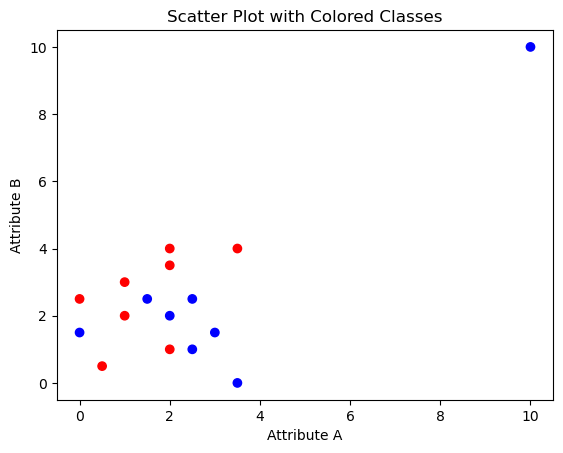

In [39]:
# Extracting data
attribute_a = data["Attribute A"]
attribute_b = data["Attribute B"]
classes = data["Class"]

# Mapping classes to colors
colors = np.array(['b', 'r', 'y'])

# Plotting
plt.scatter(attribute_a, attribute_b, color=colors[classes])
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot with Colored Classes')
plt.show()


Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

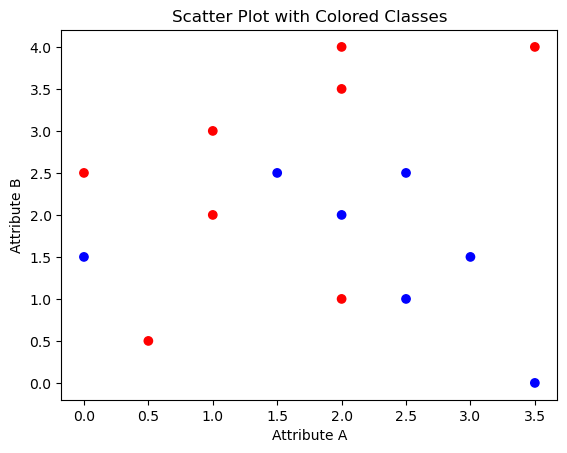

In [40]:
cleaned_data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}


plt.scatter(cleaned_data["Attribute A"], cleaned_data["Attribute B"], color=colors[cleaned_data["Class"]])
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot with Colored Classes')
plt.show()


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The blue point at [0, 1.5] could be noise.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

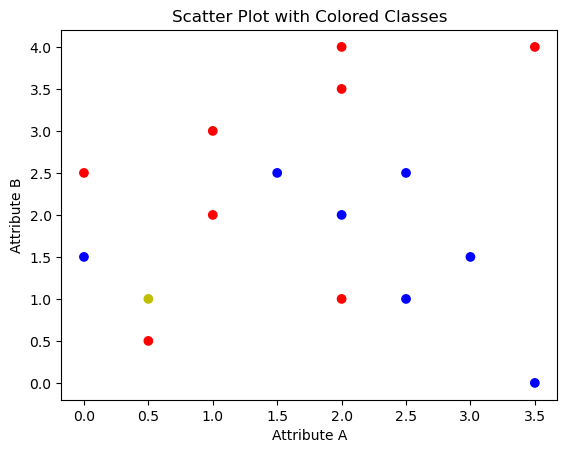

In [42]:
cleaned_data_with_new = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 0.5],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 1],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2],
}

colors = np.array(['b', 'r', 'y'])
plt.scatter(cleaned_data_with_new["Attribute A"], cleaned_data_with_new["Attribute B"], color=colors[cleaned_data_with_new["Class"]])
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot with Colored Classes')
plt.show()




e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[[0.5 1. ]
 [0.5 0.5]
 [0.  1.5]]


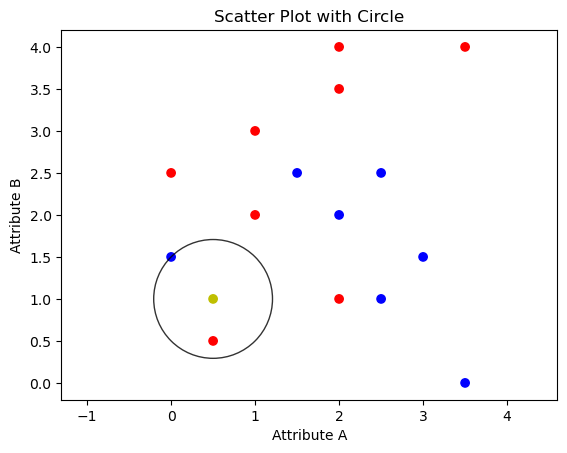

In [53]:
#Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.
def n_closest_to(example, dataset, n):
    # Calculate Euclidean distances
    distances = np.linalg.norm(dataset - example, axis=1)
    
    # Sort distances and select n closest points
    closest_indices = np.argsort(distances)[:n]
    closest_points = dataset[closest_indices]
    
    # Compute radius (distance of farthest of the n closest points)
    farthest_distance = np.max(distances[closest_indices])
    
    return closest_points, farthest_distance

location = (0.5, 1)

# Example dataset (cleaned_data)
dataset = np.column_stack((cleaned_data_with_new["Attribute A"], cleaned_data_with_new["Attribute B"]))

# Calculate closest points and farthest distance
closest_points, farthest_distance = n_closest_to(location, dataset, 3)
print(closest_points)

# Plot scatter plot and circle
plt.scatter(cleaned_data_with_new["Attribute A"], cleaned_data_with_new["Attribute B"], color=colors[cleaned_data_with_new["Class"]])
cir = plt.Circle(location, farthest_distance, fill=False, alpha=0.8)
plt.gca().add_patch(cir)
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot with Circle')
plt.axis('equal')
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [54]:
def majority_class(closest_points, cleaned_data):
    # Extract classes of closest points
    closest_classes = [cleaned_data["Class"][np.where((cleaned_data["Attribute A"] == point[0]) & (cleaned_data["Attribute B"] == point[1]))[0][0]] for point in closest_points]
    
    # Count occurrences of each class
    class_counts = np.bincount(closest_classes)
    
    # Find the class with the maximum count
    majority_class = np.argmax(class_counts)
    
    return majority_class

# Example usage
closest_points, _ = n_closest_to(location, dataset, 3)
predicted_class = majority_class(closest_points, cleaned_data_with_new)
print("Predicted class:", predicted_class)


Predicted class: 0


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [69]:
def n_closest_to(example, dataset, n):
    # Extract attribute arrays from the dataset
    attribute_a = dataset["Attribute A"]
    attribute_b = dataset["Attribute B"]
    
    # Convert attributes to a NumPy array
    dataset_array = np.column_stack((attribute_a, attribute_b))
    
    # Calculate Euclidean distances
    distances = np.linalg.norm(dataset_array - example, axis=1)
    
    # Sort distances and select n closest points
    closest_indices = np.argsort(distances)[:n]
    closest_points = dataset_array[closest_indices]
    
    # Compute radius (distance of farthest of the n closest points)
    farthest_distance = np.max(distances[closest_indices])
    
    return closest_points, farthest_distance


def majority_class(closest_points, cleaned_data):
    # Extract classes of closest points
    closest_classes = [cleaned_data["Class"][np.where((cleaned_data["Attribute A"] == point[0]) & (cleaned_data["Attribute B"] == point[1]))[0][0]] for point in closest_points]
    
    # Count occurrences of each class
    class_counts = np.bincount(closest_classes)
    
    # Find the class with the maximum count
    majority_class = np.argmax(class_counts)
    
    return majority_class



data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 0.5],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 1],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2],
}

count = 0

for i in range(len(data['Attribute A'])):
    actual_class = data["Class"][i]

    # Create training set by excluding the i-th element
    training_set = data.copy()
    training_set['Attribute A'] = training_set['Attribute A'][:i] + training_set['Attribute A'][i+1:]
    training_set['Attribute B'] = training_set['Attribute B'][:i] + training_set['Attribute B'][i+1:]
    training_set['Class'] = training_set['Class'][:i] + training_set['Class'][i+1:]
    
    closest_points, _ = n_closest_to((data['Attribute A'][i], data['Attribute B'][i]), training_set, 3)
    prediction = majority_class(closest_points, training_set)
    
    if prediction == actual_class:
        count += 1

# Calculate overall accuracy
overall_accuracy = count / len(data['Attribute A'])
print("Overall accuracy =", overall_accuracy)



Overall accuracy = 0.625


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [100]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = fetch_openml(name='mnist_784', version=1)

# Extract features and labels
X, y = mnist["data"], mnist["target"]

# Create a subset of size 10000
subset_size = 10000
subset_indices = np.random.choice(len(X), subset_size, replace=False)
X_subset, y_subset = X.iloc[subset_indices], y.iloc[subset_indices]

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=1)





b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

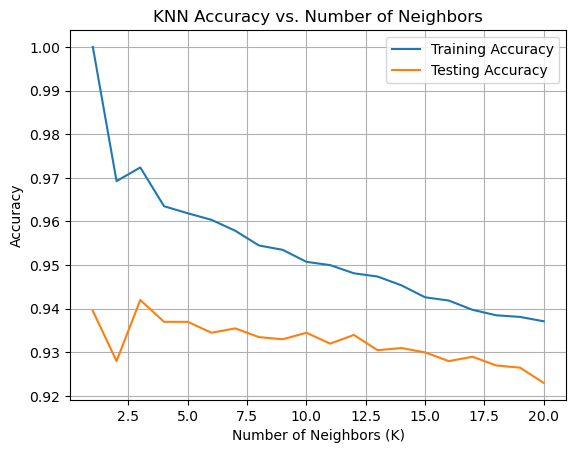

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over values of K from 1 to 20
for k in range(1, 21):
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate testing accuracy
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plot the graph
plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


##### it seems that the best value is 1 or 2, this could be due to overfitting


c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


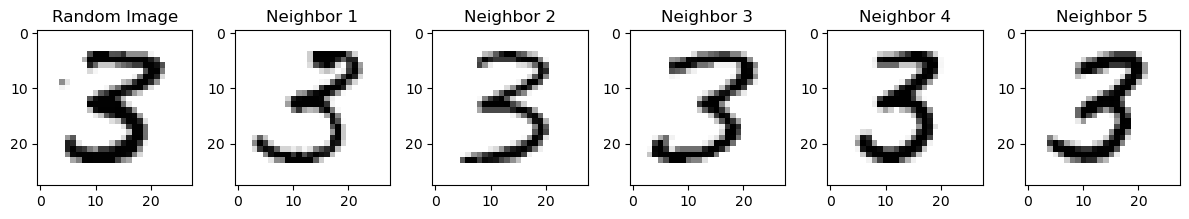

In [98]:
from sklearn.neighbors import NearestNeighbors

# Select a random image index from the testing set
random_index = np.random.randint(len(X_test))

# Get the features of the random image
random_image = X_test.iloc[random_index].values.reshape(28, 28)

# Initialize a Nearest Neighbors model
k = 5  # Number of nearest neighbors to consider
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(X_train)

# Find the k nearest neighbors of the random image
distances, indices = nn_model.kneighbors([X_test.iloc[random_index]])

# Plot the random image and its nearest neighbors
plt.figure(figsize=(12, 4))

# Plot the random image
plt.subplot(1, k + 1, 1)
plt.imshow(random_image, cmap='binary')
plt.title('Random Image')

# Plot the nearest neighbors
for i in range(k):
    plt.subplot(1, k + 1, i + 2)
    neighbor_index = indices[0][i]
    neighbor_image = X_train.iloc[neighbor_index].values.reshape(28, 28)
    plt.imshow(neighbor_image, cmap='binary')
    plt.title(f'Neighbor {i + 1}')

plt.tight_layout()
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [121]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of values to loop through for n_components and n_neighbors
n_components_list = [1, 2, 3, 4, 5, 10, 20, 50]
n_neighbors_list = [1, 2, 3, 4, 5, 7]

# Loop through different values of n_components and n_neighbors
for n_components in n_components_list:
    for n_neighbors in n_neighbors_list:
        try:
            # Define dimensionality reduction technique
            dimensionality_reduction = TruncatedSVD(n_components=n_components)
            
            # Define KNN model
            knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
            
            # Create a pipeline
            model = make_pipeline(dimensionality_reduction, knn_model)
            
            # Fit the model to the training data
            model.fit(X_train, y_train)
            
            # Make predictions on the testing data
            y_pred = model.predict(X_test)
            
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # Print accuracy along with parameters
            print(f"n_components={n_components}, n_neighbors={n_neighbors}: Accuracy={accuracy}")
        except AttributeError:
            print('error raised due to dimension error')

### best model is n_components=10, n_neighbors=7: Accuracy=0.907 
# this makes sense, as a digit cna eb defined by that many pixels, and the number of neighbors is enough to find a lot of ismilarites

n_components=1, n_neighbors=1: Accuracy=0.1365
n_components=1, n_neighbors=2: Accuracy=0.1455
n_components=1, n_neighbors=3: Accuracy=0.1505
n_components=1, n_neighbors=4: Accuracy=0.1585
n_components=1, n_neighbors=5: Accuracy=0.1565
n_components=1, n_neighbors=7: Accuracy=0.1645
n_components=2, n_neighbors=1: Accuracy=0.2795
n_components=2, n_neighbors=2: Accuracy=0.2905
n_components=2, n_neighbors=3: Accuracy=0.29
n_components=2, n_neighbors=4: Accuracy=0.302
n_components=2, n_neighbors=5: Accuracy=0.2995
n_components=2, n_neighbors=7: Accuracy=0.3035
n_components=3, n_neighbors=1: Accuracy=0.428
n_components=3, n_neighbors=2: Accuracy=0.4185
n_components=3, n_neighbors=3: Accuracy=0.4325
n_components=3, n_neighbors=4: Accuracy=0.4485
n_components=3, n_neighbors=5: Accuracy=0.458
n_components=3, n_neighbors=7: Accuracy=0.476
n_components=4, n_neighbors=1: Accuracy=0.508
n_components=4, n_neighbors=2: Accuracy=0.5115
n_components=4, n_neighbors=3: Accuracy=0.531
n_components=4, n_nei

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [205]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('train.csv')
data.drop('PassengerId', axis=1, inplace=True)
data.head()


#normalziing
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare'] 
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())




# One-hot encoding
data = pd.get_dummies(data, columns=['Sex'])
data = pd.get_dummies(data, columns=['Embarked'])

# Renaming the columns for clarity
data = data.rename(columns={'Sex_male': 'Male', 'Sex_female': 'Female'})

data.dropna(inplace=True)


X = data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.columns)



Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female', 'Male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [190]:
k = 14

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5945945945945946


In [228]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of values for the number of neighbors
neighbors = np.arange(1, 20)

# Initialize variables to store the best accuracy and corresponding value of n_neighbors
best_accuracy = 0
best_n = 0

# Iterate over different values of neighbors
for n in neighbors:
    # Create an instance of the KNN classifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n)

    # Fit the KNN classifier to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test)

    # Compute the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if the current accuracy is better than the previous best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n

# Print the best accuracy and corresponding value of n_neighbors
print("Best accuracy:", best_accuracy)
print("Corresponding value of n_neighbors:", best_n)


Best accuracy: 0.7837837837837838
Corresponding value of n_neighbors: 10


In [232]:
submission = pd.read_csv('test.csv')

#normalziing
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare'] 
submission[numerical_columns] = (submission[numerical_columns] - submission[numerical_columns].min()) / (submission[numerical_columns].max() - submission[numerical_columns].min())

# One-hot encoding
submission = pd.get_dummies(submission, columns=['Sex'])
submission = pd.get_dummies(submission, columns=['Embarked'])


# Renaming the columns for clarity
submission = submission.rename(columns={'Sex_male': 'Male', 'Sex_female': 'Female'})
submission.fillna(submission.mean(), inplace=True)
submission.head()




/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_7222/4211925134.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  submission.fillna(submission.mean(), inplace=True)


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0.452723,0.000,0.000000,330911,0.015282,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0.617566,0.125,0.000000,363272,0.013663,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0.815377,0.000,0.000000,240276,0.018909,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",0.353818,0.000,0.000000,315154,0.016908,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.287881,0.125,0.111111,3101298,0.023984,NaN,1,0,0,0,1


In [235]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are defined previously
k = 10
# Create an instance of the KNN classifier with feature names
knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Create a new column 'Survived' in the submission DataFrame
submission['Survived'] = 0

# Iterate through each row in the submission DataFrame
for index, row in submission.iterrows():
    # Extract the features for the current row
    features = row[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female', 'Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].values.reshape(1, -1)
    
    # Make a prediction for the current row
    prediction = knn.predict(features)
    
    # Assign the predicted class to the 'Survived' column for the current row
    submission.at[index, 'Survived'] = prediction[0]

# Print the 'Survived' column



/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warni

0      0
1      1
2      0
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    0
Name: Survived, Length: 418, dtype: int64


/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/samdvorin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warni

In [236]:
print(submission['Survived'])

0      0
1      1
2      0
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    0
Name: Survived, Length: 418, dtype: int64


In [237]:
# Create a new DataFrame with only 'PassengerId' and 'Survived' columns
submission_result = submission[['PassengerId', 'Survived']]

# Write the DataFrame to a new CSV file
submission_result.to_csv('submission_result.csv', index=False)


In [ ]:
#KAGGLE USERNMAE samdvorin